# Ignition Example

This example uses `ctwrap` for ideal gas constant pressure reactor simulations (i.e. ignition) defined by the simulation module `ignition` (`ctwrap.modules.ignition`).

## Function/Class Definitions

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py
import json
col = mpl.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
import ctwrap as cw
cw.__version__

'0.3.3'

## Simulations

### Create Simulation object

Uses a module in the `modules` folder. Modules do not have to depend on `ctwrap`.

In [3]:
sim = cw.Simulation.from_module(cw.modules.ignition)
sim

### Create Simulation Handler

Parameters are specified via YAML file

In [4]:
# create variation object
fname = 'ignition.yaml'
sh = cw.SimulationHandler.from_yaml(fname, verbosity=1)
sh

Simulations for entry `initial.phi` with values: [0.4, 0.6, 0.8, 1.0, 1.2, 1.4,
1.6, 1.8]


### Run parallel simulation

In [5]:
%%time
sh.run_parallel(sim)

 * Starting parallel batch simulation using 1 cores


 * running `case_0` (Process-1)

 * running `case_1` (Process-1)

 * running `case_2` (Process-1)

 * running `case_3` (Process-1)

 * running `case_4` (Process-1)

 * running `case_5` (Process-1)

 * running `case_6` (Process-1)

 * running `case_7` (Process-1)

CPU times: user 22.2 ms, sys: 13.8 ms, total: 36 ms
Wall time: 1min 15s


True

## Create graphical output

### Load data from file

In [6]:
data = h5py.File(sh.output_name, 'r')

In [7]:
data.keys()

<KeysViewHDF5 ['case_0', 'case_1', 'case_2', 'case_3', 'case_4', 'case_5', 'case_6', 'case_7']>

In [8]:
data.attrs.keys()

<KeysViewHDF5 ['cases', 'defaults', 'strategy']>

In [9]:
var = json.loads(data.attrs['strategy'])
var

{'sequence': {'initial.phi': [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]}}

In [10]:
default = json.loads(data.attrs['defaults'])
default

{'initial': {'T': '1000. kelvin',
  'P': '101325. pascal',
  'phi': 1.0,
  'fuel': 'H2',
  'oxidizer': 'O2:1,AR:5'},
 'chemistry': {'mechanism': 'h2o2.yaml'},
 'settings': {'delta_t': 5e-07,
  'max_time_step': 2e-10,
  'n_points': 1000,
  'atol': 1e-18,
  'rtol': 1e-15}}

In [11]:
phi = var['sequence'].get('initial.phi')
phi

[0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

### Plot

Display time histories for gas temperature.

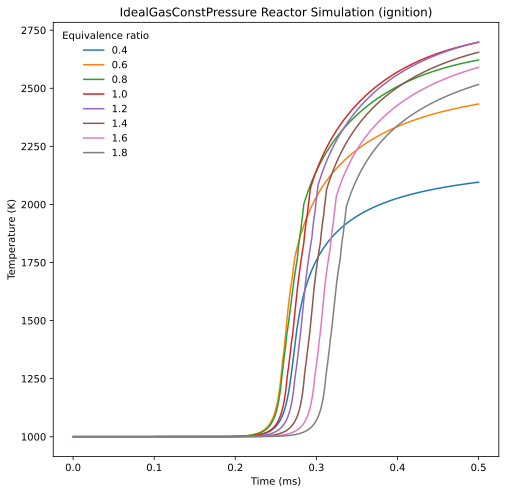

In [12]:
# create figure and adjust size
fig, ax = plt.subplots(1) 
fig.set_size_inches(8.,8.)

# plot results
for f, key in enumerate(data):
    df = data[key]
    ax.plot(1000*df['t'][:], df['T'][:], color=col[f], label=phi[f]) 

# add title/axis labels
ax.set_title(r'IdealGasConstPressure Reactor Simulation (ignition)')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='upper left', title='Equivalence ratio')
leg.draw_frame(False) 